### Student Information
Name:

Student ID:

GitHub ID:

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

---

# First Part

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


<BarContainer object of 30 artists>

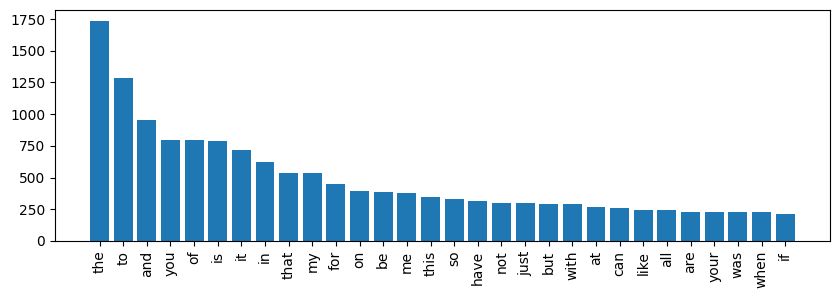

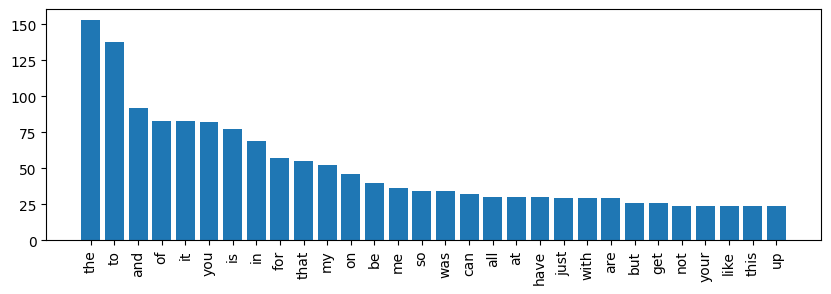

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

count_vectorizer = CountVectorizer()

train_counts = count_vectorizer.fit_transform(train_df.text)
train_counts = np.asarray(train_counts.sum(axis=0)).flatten()
train_idx = np.argsort(train_counts)[::-1][:30]

fig1 = plt.figure(figsize=(10,3))
plt.xticks(rotation='vertical')
plt.bar(x=count_vectorizer.get_feature_names_out()[train_idx], height=train_counts[train_idx])

test_counts = count_vectorizer.transform(test_df.text)
test_counts = np.asarray(test_counts.sum(axis=0)).flatten()
test_idx = np.argsort(test_counts)[::-1][:30]

fig2 = plt.figure(figsize=(10,3))
plt.xticks(rotation='vertical')
plt.bar(x=count_vectorizer.get_feature_names_out()[test_idx], height=test_counts[test_idx])

In [3]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
import nltk

count_vectorizer_1000_features = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
feature = count_vectorizer_1000_features.fit_transform(train_df.text)

transformer = TfidfTransformer(smooth_idf=True)
data = transformer.fit_transform(feature)
tfidf = pd.DataFrame(data.toarray(),columns=count_vectorizer_1000_features.get_feature_names_out())
print(count_vectorizer_1000_features.get_feature_names_out()[100:110])
print(tfidf)

/Users/al02297569/anaconda3/envs/lab2/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']
             !         #    $    %         &         '   'd       'll   'm  \
0     0.000000  0.000000  0.0  0.0  0.000000  0.174010  0.0  0.000000  0.0   
1     0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0   
2     0.000000  0.000000  0.0  0.0  0.000000  0.195422  0.0  0.000000  0.0   
3     0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0   
4     0.000000  0.087542  0.0  0.0  0.000000  0.000000  0.0  0.239639  0.0   
...        ...       ...  ...  ...       ...       ...  ...       ...  ...   
3608  0.000000  0.257458  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0   
3609  0.000000  0.162923  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0   
3610  0.000000  0.000000  0.0  0.0  0.312407  0.142718  0.0  0.000000  0.0   
3611  0.136264  0.084347  0.0  0.0  0.188626  0.000000  0.0  0.000000  0.0   
3612  0.000000  0.153857  0.0  0.0  0.000000  0.314367  0.0  0.000000  0.0

In [5]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

/Users/al02297569/anaconda3/envs/lab2/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x1439bbbe0>)

In [6]:
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [7]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

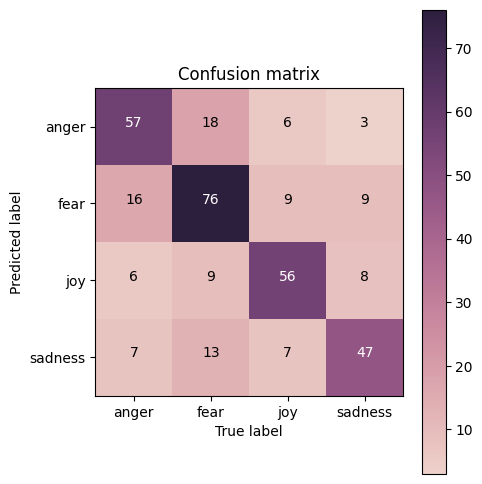

In [9]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

--- Answer ---

The diagonal values (57 for anger, 76 for fear, 56 for joy, and 47 for sadness) represent correct predictions for each category.

The model performs best for 'fear' with 76 correct predictions, and worst for 'sadness' with 47 correct predictions. Misclassifications occur most between 'anger', 'joy', and 'sadness', indicating the model struggles to distinguish these emotions. To improve, the model needs better differentiation between these three emotions.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

train accuracy is 0.7918627179629117
test accuracy is 0.6974063400576369


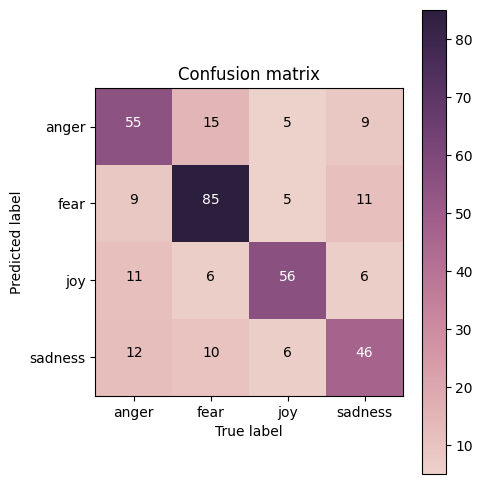

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)
pred_train = multinomial.predict(X_train)
pred_test = multinomial.predict(X_test)

print(f"train accuracy is {accuracy_score(y_true=y_train, y_pred=pred_train)}")
print(f"test accuracy is {accuracy_score(y_true=y_test, y_pred=pred_test)}")

mat = confusion_matrix(y_true=y_test, y_pred=pred_test)

plot_confusion_matrix(mat, classes=['anger', 'fear', 'joy', 'sadness'], title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

--- Answer ---

The Decision Tree and Naive Bayes models have similar performance, with the Naive Bayes model scoring slightly higher. The Decision Tree, a discriminative model, may neglect key values in the training data due to pruning, which could impact accuracy.

We observe that the Decision Tree model has a training accuracy close to 1 but a testing accuracy of only 0.68, indicating overfitting. This overfitting tendency in Decision Trees is primarily due to their unlimited complexity, lack of regularization, and sensitivity to outliers in the training data. To mitigate overfitting, we can prune the tree to limit its depth or use ensemble learning methods like Random Forests.

On the other hand, the Naive Bayes model, a generative model, has closer training and testing accuracies, though we still notice slight overfitting. Overall, the Naive Bayes model seems more stable in this scenario and outperforms the Decision Tree model on the testing data.

---

In [11]:
from sklearn.preprocessing import LabelEncoder
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

In [12]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2023-12-12 22:59:37.294004: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-12 22:59:37.294028: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-12 22:59:37.294033: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-12 22:59:37.294065: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-12 22:59:37.294083: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../logs/training_log_homework.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


2023-12-12 22:59:37.663352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 5s 43ms/step - loss: 1.3316 - accuracy: 0.3728 - val_loss: 1.2587 - val_accuracy: 0.4438
Epoch 2/25
113/113 [==============================] - 4s 33ms/step - loss: 1.0151 - accuracy: 0.6291 - val_loss: 0.9142 - val_accuracy: 0.6657
Epoch 3/25
113/113 [==============================] - 4s 33ms/step - loss: 0.6121 - accuracy: 0.7780 - val_loss: 0.7903 - val_accuracy: 0.7147
Epoch 4/25
113/113 [==============================] - 4s 32ms/step - loss: 0.4354 - accuracy: 0.8386 - val_loss: 0.7631 - val_accuracy: 0.6916
Epoch 5/25
113/113 [==============================] - 3s 30ms/step - loss: 0.3408 - accuracy: 0.8760 - val_loss: 0.8085 - val_accuracy: 0.6945
Epoch 6/25
113/113 [==============================] - 3s 30ms/step - loss: 0.2793 - accuracy: 0.9020 - val_loss: 0.8382 - val_accuracy: 0.6830
Epoch 7/25
113/113 [==============================] - 4s 33ms/step - loss: 0.2333 - accuracy: 0.9250 - val_loss: 0.8625 - val_accuracy: 0.6916
Epoch 8/25

In [14]:
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log_homework.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.372820,1.331648,0.443804,1.258651
1,1,0.629117,1.015102,0.665706,0.914160
2,2,0.778024,0.612111,0.714697,0.790272
3,3,0.838638,0.435400,0.691643,0.763110
4,4,0.876003,0.340823,0.694524,0.808454
5,5,0.902020,0.279262,0.682997,0.838168
6,6,0.924993,0.233347,0.691643,0.862490
7,7,0.939109,0.191773,0.694524,0.912983
8,8,0.948519,0.168825,0.697406,0.951313
9,9,0.957930,0.142773,0.685879,1.001117


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

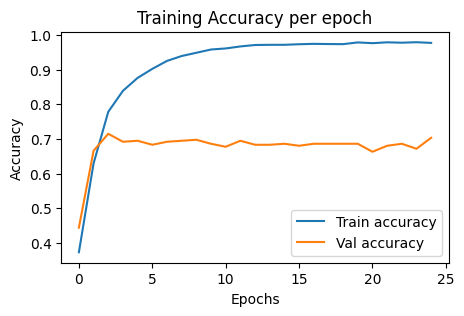

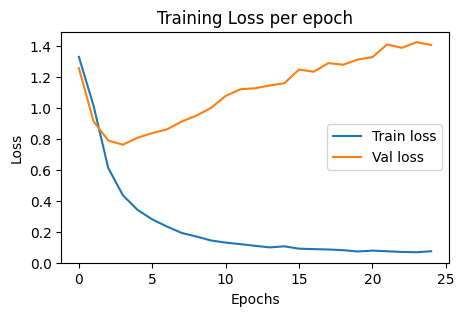

In [15]:
plt.figure(figsize=(5,3))
plt.title('Training Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_log.epoch, training_log.accuracy)
plt.plot(training_log.epoch, training_log.val_accuracy)
plt.legend(["Train accuracy", "Val accuracy"])


plt.figure(figsize=(5,3))
plt.title('Training Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(training_log.epoch, training_log.loss)
plt.plot(training_log.epoch, training_log.val_loss)
plt.legend(["Train loss", "Val loss"])

--- Answer ---

When accuracy goes up, loss goes down. This is as expected, since higher accuracy means fewer mistakes.
However, there's a risk of overfitting. We see this when, after a few epochs, the validation loss starts to rise even though training accuracy remains high. This could be due to too many epochs or a small dataset.
When it comes to the accuracy curve, training accuracy increases slowly, but validation accuracy plateaus after about the fifth epoch. This is another sign of overfitting.

In [16]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1325,20468,@ChowdharyMahima Appreciate ur 'half truth.' D...,"[@, ChowdharyMahima, Appreciate, ur, 'half, tr..."
3125,40298,3 weeks into the course and have had the kitch...,"[3, weeks, into, the, course, and, have, had, ..."
3348,40521,@duncantrussell does Remo Williams ever actual...,"[@, duncantrussell, does, Remo, Williams, ever..."
2459,30455,@AphoticSanguine —but be a little playful. \n\...,"[@, AphoticSanguine, —but, be, a, little, play..."
1383,20526,Why is it when you nap during the day you are ...,"[Why, is, it, when, you, nap, during, the, day..."


In [17]:
from gensim.models import Word2Vec

training_corpus = train_df['text_tokenized'].values

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [18]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.40491903,  0.321903  , -0.22967286,  0.28775838, -0.44963467,
       -1.2591077 ,  0.26817876,  1.4360328 , -0.33288956, -0.96509075,
       -0.4409144 , -0.8096398 , -0.42134133,  0.26419863, -0.08900303,
       -0.5975657 ,  0.47588813, -0.21786417,  0.0500114 , -0.93256885,
        0.26772702,  0.99531156,  0.46474487,  0.36927283,  0.33222374,
        0.26871446, -0.53494656,  0.50287247, -0.08201183, -0.17966866,
        0.3463982 , -0.5154922 ,  0.7055537 , -0.8615928 , -0.48607743,
        0.2832789 ,  0.83521014, -0.08213013, -0.3499414 , -0.7753645 ,
       -0.32259017,  0.14443283,  0.05192685,  0.634351  ,  0.52268153,
       -0.04313564, -0.7837997 , -0.4376747 ,  0.390886  , -0.04615413,
       -0.38324332, -0.27061617,  0.38443425, -0.28329265, -0.2617171 ,
       -0.47468367,  0.20278677, -0.501026  , -0.1179721 ,  0.02186844,
        0.1177905 ,  0.17881441,  0.6646957 ,  0.04799926, -0.15594126,
        0.57512015, -0.02780721,  0.5340362 , -1.2872758 ,  0.36

In [19]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('🕋', 0.9131260514259338),
 ('Be', 0.9063858389854431),
 ('plz', 0.8947124481201172),
 ('free', 0.892940878868103),
 ('HilltopBindery', 0.8903259038925171),
 ('birthday', 0.8902263641357422),
 ('.\\nA', 0.8891425728797913),
 ('cry', 0.8869736790657043),
 ('future', 0.8867014050483704),
 ('help', 0.8860905170440674)]

In [20]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [21]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

In [22]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


--- Answer ---

One way is to average the vectors, which gives us a composite representation of the sentence. Another method involves maintaining the word vectors and padding all sentences to the same length, yielding a 2D representation of each sentence.

Furthermore, we can enhance the word vectors with position information, akin to the position encoding used in Transformer models. With this positional information incorporated, our model can gain insights into the varying meanings of words depending on their context.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [23]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
# change these two lines
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

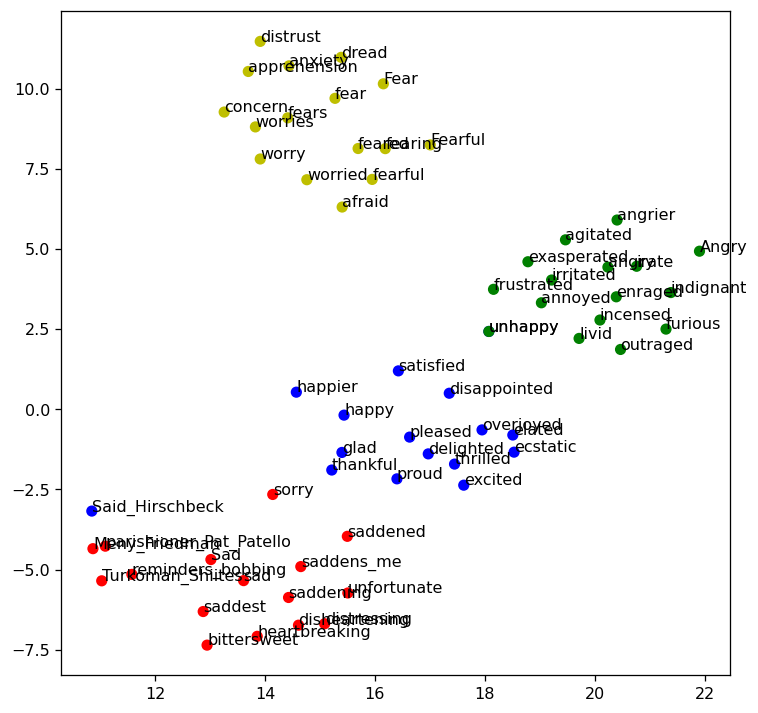

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---

# Third Part